In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
import nltk
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('Twitter Sentiments.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Remove pattern in the text

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt 


In [10]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Remove twitter handels (@user)

In [11]:
df['clean_text'] = np.vectorize(remove_pattern)(df['tweet'], '@[/w]*')

In [12]:
df.head()

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for #lyft credit i can't use ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


## Remove special characters, numbers and punctitions

In [14]:
df['clean_text'] = df['clean_text'].str.replace('^a-zA-Z#', " ")

In [15]:
df.head()

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for #lyft credit i can't use ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


## Remove short words 

In [17]:
df['clean_text'] = df['clean_text'].apply(
    lambda x: " ".join([w for w in x.split() if len(w) > 3]))


In [18]:
df.head()

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,user when father dysfunctional selfish drags k...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks #lyft credit can't cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


## Individual words considered as tokens 

In [20]:
tokenized_tweet = df['clean_text'].apply(lambda x: x.split())

In [21]:
tokenized_tweet.head()

0    [user, when, father, dysfunctional, selfish, d...
1    [user, user, thanks, #lyft, credit, can't, cau...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_text, dtype: object

## Stem the words 

In [22]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(word) for word in x])


In [23]:
tokenized_tweet.head()

0    [user, when, father, dysfunct, selfish, drag, ...
1    [user, user, thank, #lyft, credit, can't, caus...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_text, dtype: object

## Combine words into single sentence 

In [24]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_text'] = tokenized_tweet

In [25]:
df.head()

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,user when father dysfunct selfish drag kid int...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thank #lyft credit can't caus they d...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


# Exploratory Data Analysis 

In [26]:
! pip install wordcloud

## Display the frequent words 

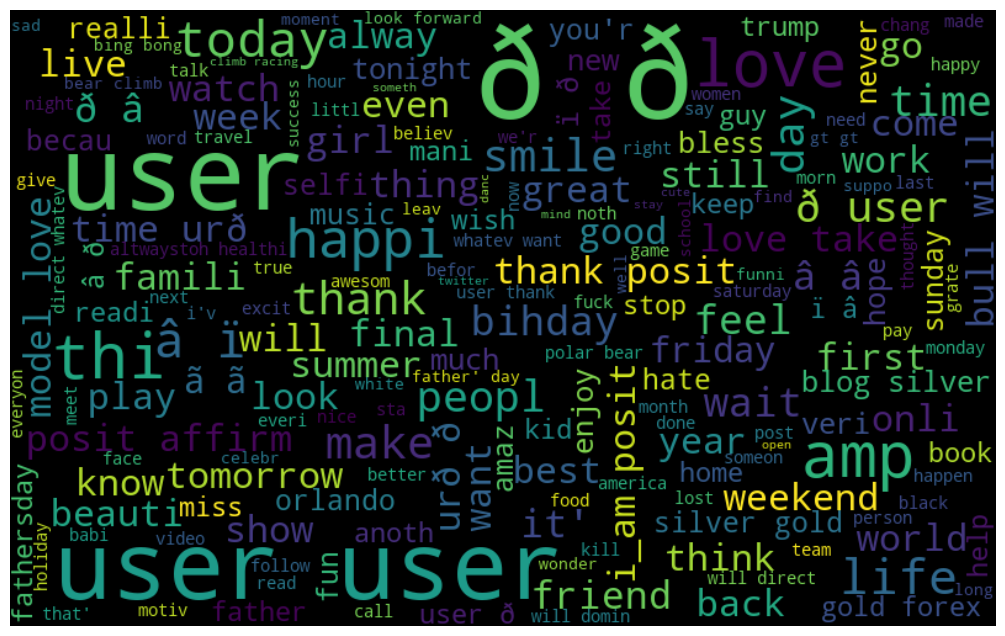

In [27]:
all_words = " ".join([x for x in df['clean_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Frequents words for positive comments 

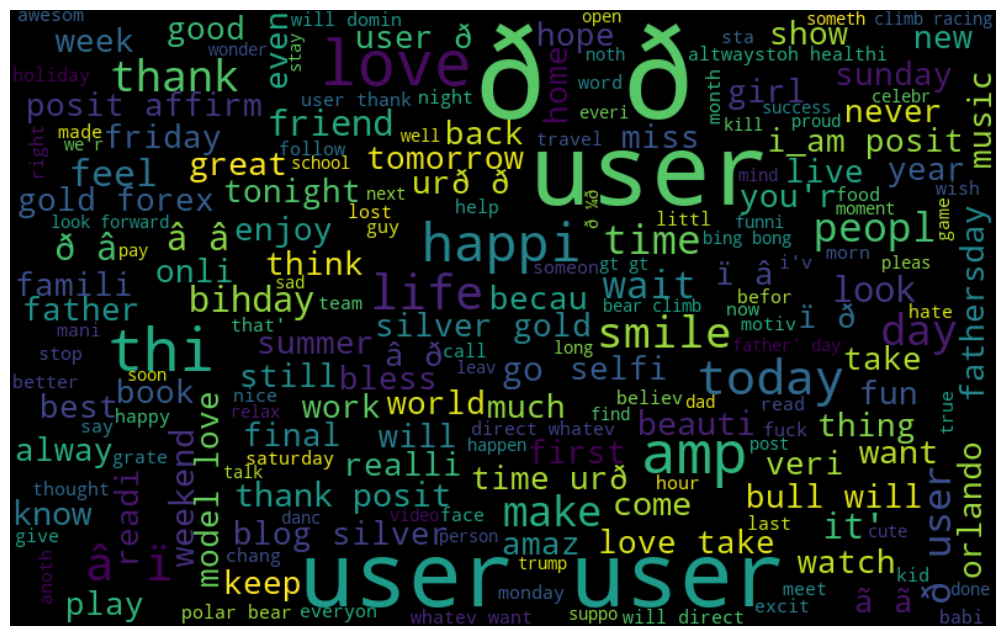

In [28]:
all_words = " ".join([x for x in df['clean_text'][df['label']== 0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Frequents words for negative comments 

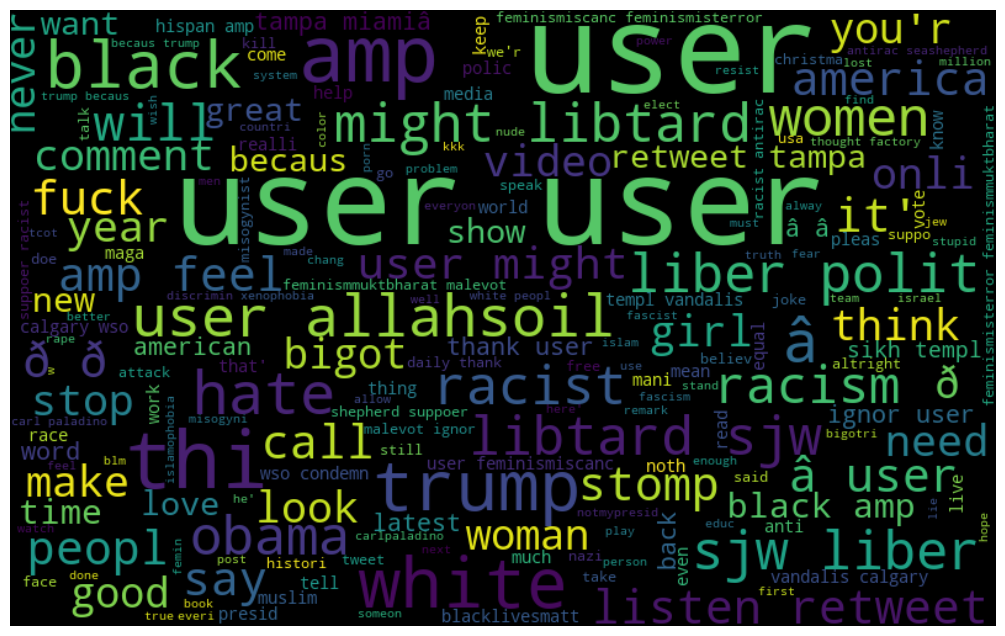

In [29]:
all_words = " ".join([x for x in df['clean_text'][df['label']== 1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Extracting the hashtag 

In [36]:
import re

def hashtag_extract(tweet):
    hashtags = []
    for t in tweet:  
        ht = re.findall(r"#(\w+)", t) 
        hashtags.append(ht)
    return hashtags


NameError: name 't' is not defined

## Extract hashtag from non racist/sexist tweets 

In [38]:
ht_positive = hashtag_extract(df['clean_text'][df['label'] == 0])


In [44]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [45]:
ht_positive = sum(ht_positive, [])

In [47]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

## Extract hashtag from racist/sexist tweets 

In [39]:
ht_negative = hashtag_extract(df['clean_text'][df['label'] == 1])

In [43]:

ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [48]:
ht_negative = sum(ht_negative, [])

In [49]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

## Dictionary function form NLTK

#### For Positive comments 

In [51]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})


In [53]:
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


## Select Top 15 hashtags 

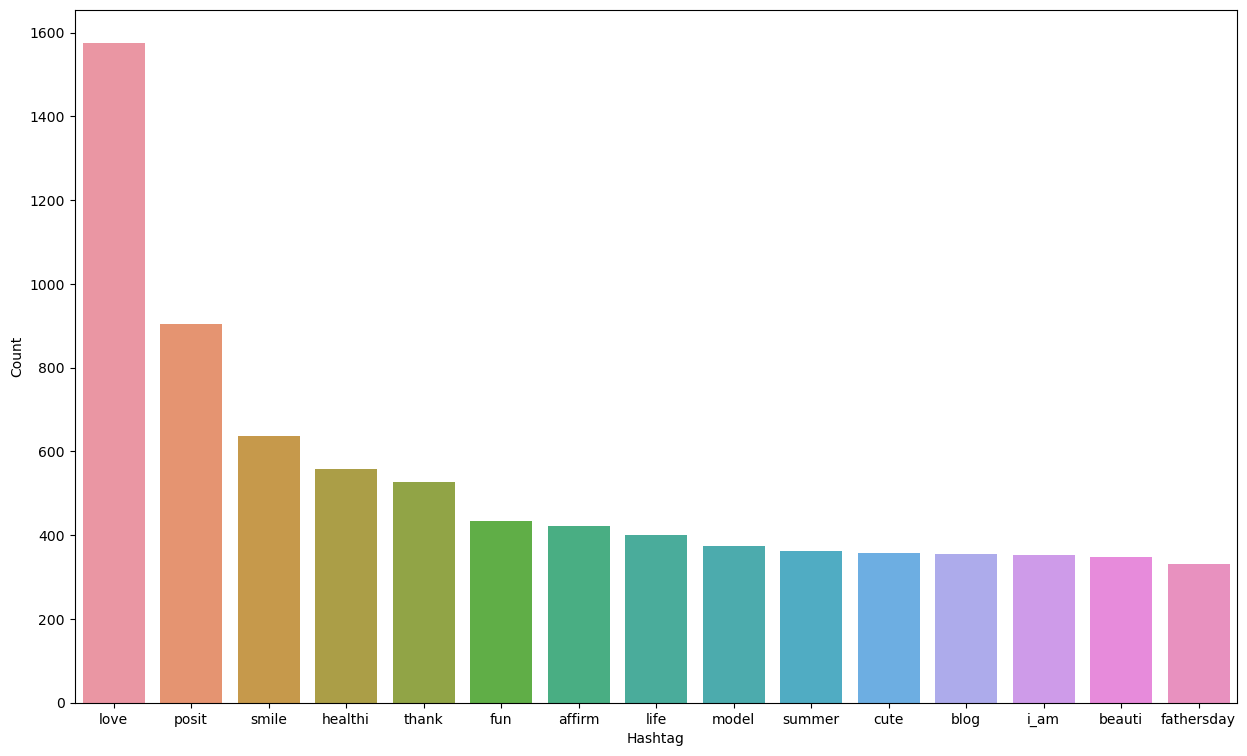

In [56]:
d = d.nlargest(columns='Count', n=15)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x = 'Hashtag', y= 'Count')
plt.show()

#### For Positive comments 

In [57]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})


In [58]:
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


## Select Top 15 hashtags 

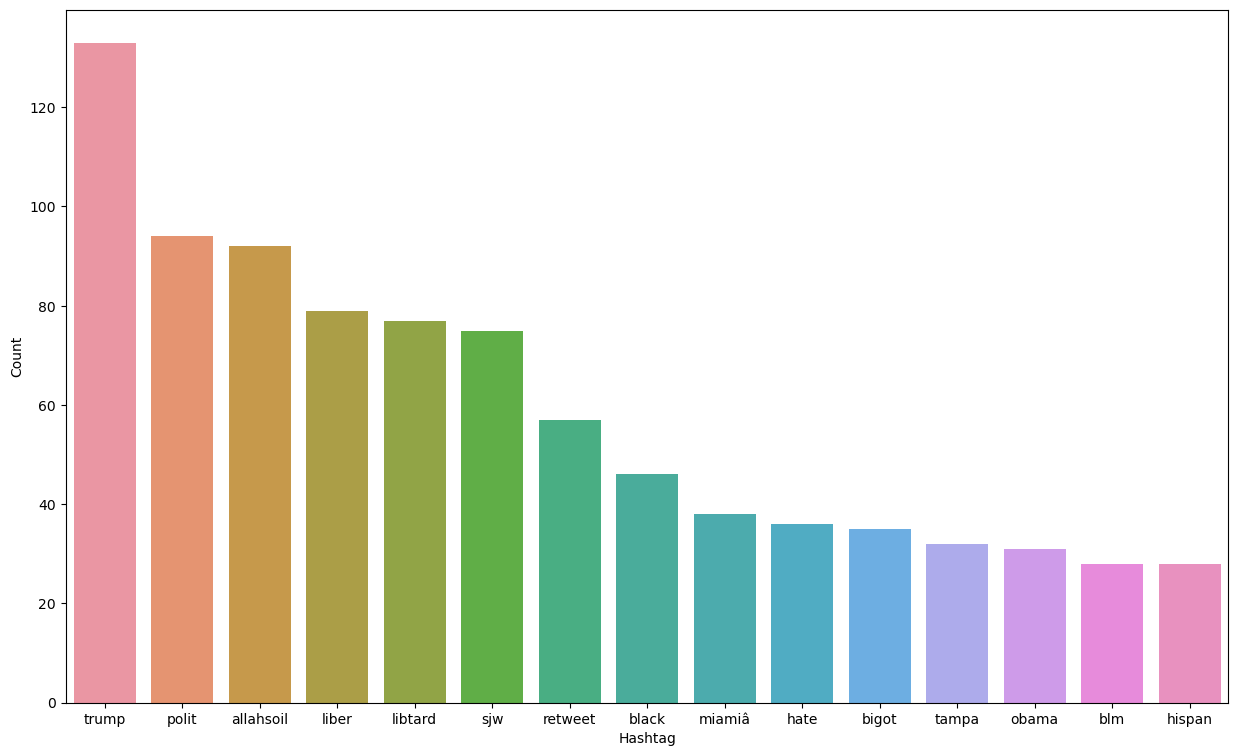

In [59]:
d = d.nlargest(columns='Count', n=15)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x = 'Hashtag', y= 'Count')
plt.show()

## Feature Extraction 

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
bow_ventorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_ventorizer.fit_transform(df['clean_text'])

In [66]:
# bow[0].toarray()

## Model Traning 

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [74]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [75]:
pred = model.predict(x_test)
f1_score(y_test, pred)

0.508274231678487

In [77]:
accuracy_score(y_test, pred)

0.9479414341133775

## Use probabilty to get output 

In [79]:
pred_prob = model.predict_proba(x_test)
prob = pred_prob[:, 1] >= 0.3
pred = pred.astype(int)

f1_score(y_test, pred)

0.508274231678487

In [80]:
accuracy_score(y_test, pred)

0.9479414341133775

In [83]:
pred_prob[0][1] >= 0.3

False